In [1]:
%pip install numpy
%pip install matplotlib
%pip install pypng

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.6 MB 5.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.6/12.6 MB 5.4 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.6 MB 5.3 MB/s eta 0:00:02
   -------------- ------------------------- 4.5/12.6 MB 4.8 MB/s eta 0:00:02
   ----------------- ---------------------- 5.5/12.6 MB 4.9 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.6 MB 4.8 MB/s eta 0:00:02
   ---------------------- ----------------- 7.1/12.6 MB 4.8 MB/s eta 0:00:02
   ------------------------ --------------- 7.6/12.6 MB 4.4 MB/s eta 0:00:02
   ------------------------- -------------- 8.1/12.6 MB 4.1 MB/s eta 0:00:02
   ---------------------------- ----------- 8.9/12.6 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.6 MB 4.0 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 3.3 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.0 MB 12.7 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 12.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 12.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 12.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 12.1 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 3.5 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 4.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? e


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import png
import random
import matplotlib.animation as animation
from matplotlib.colors import hsv_to_rgb
from matplotlib import colors
import math

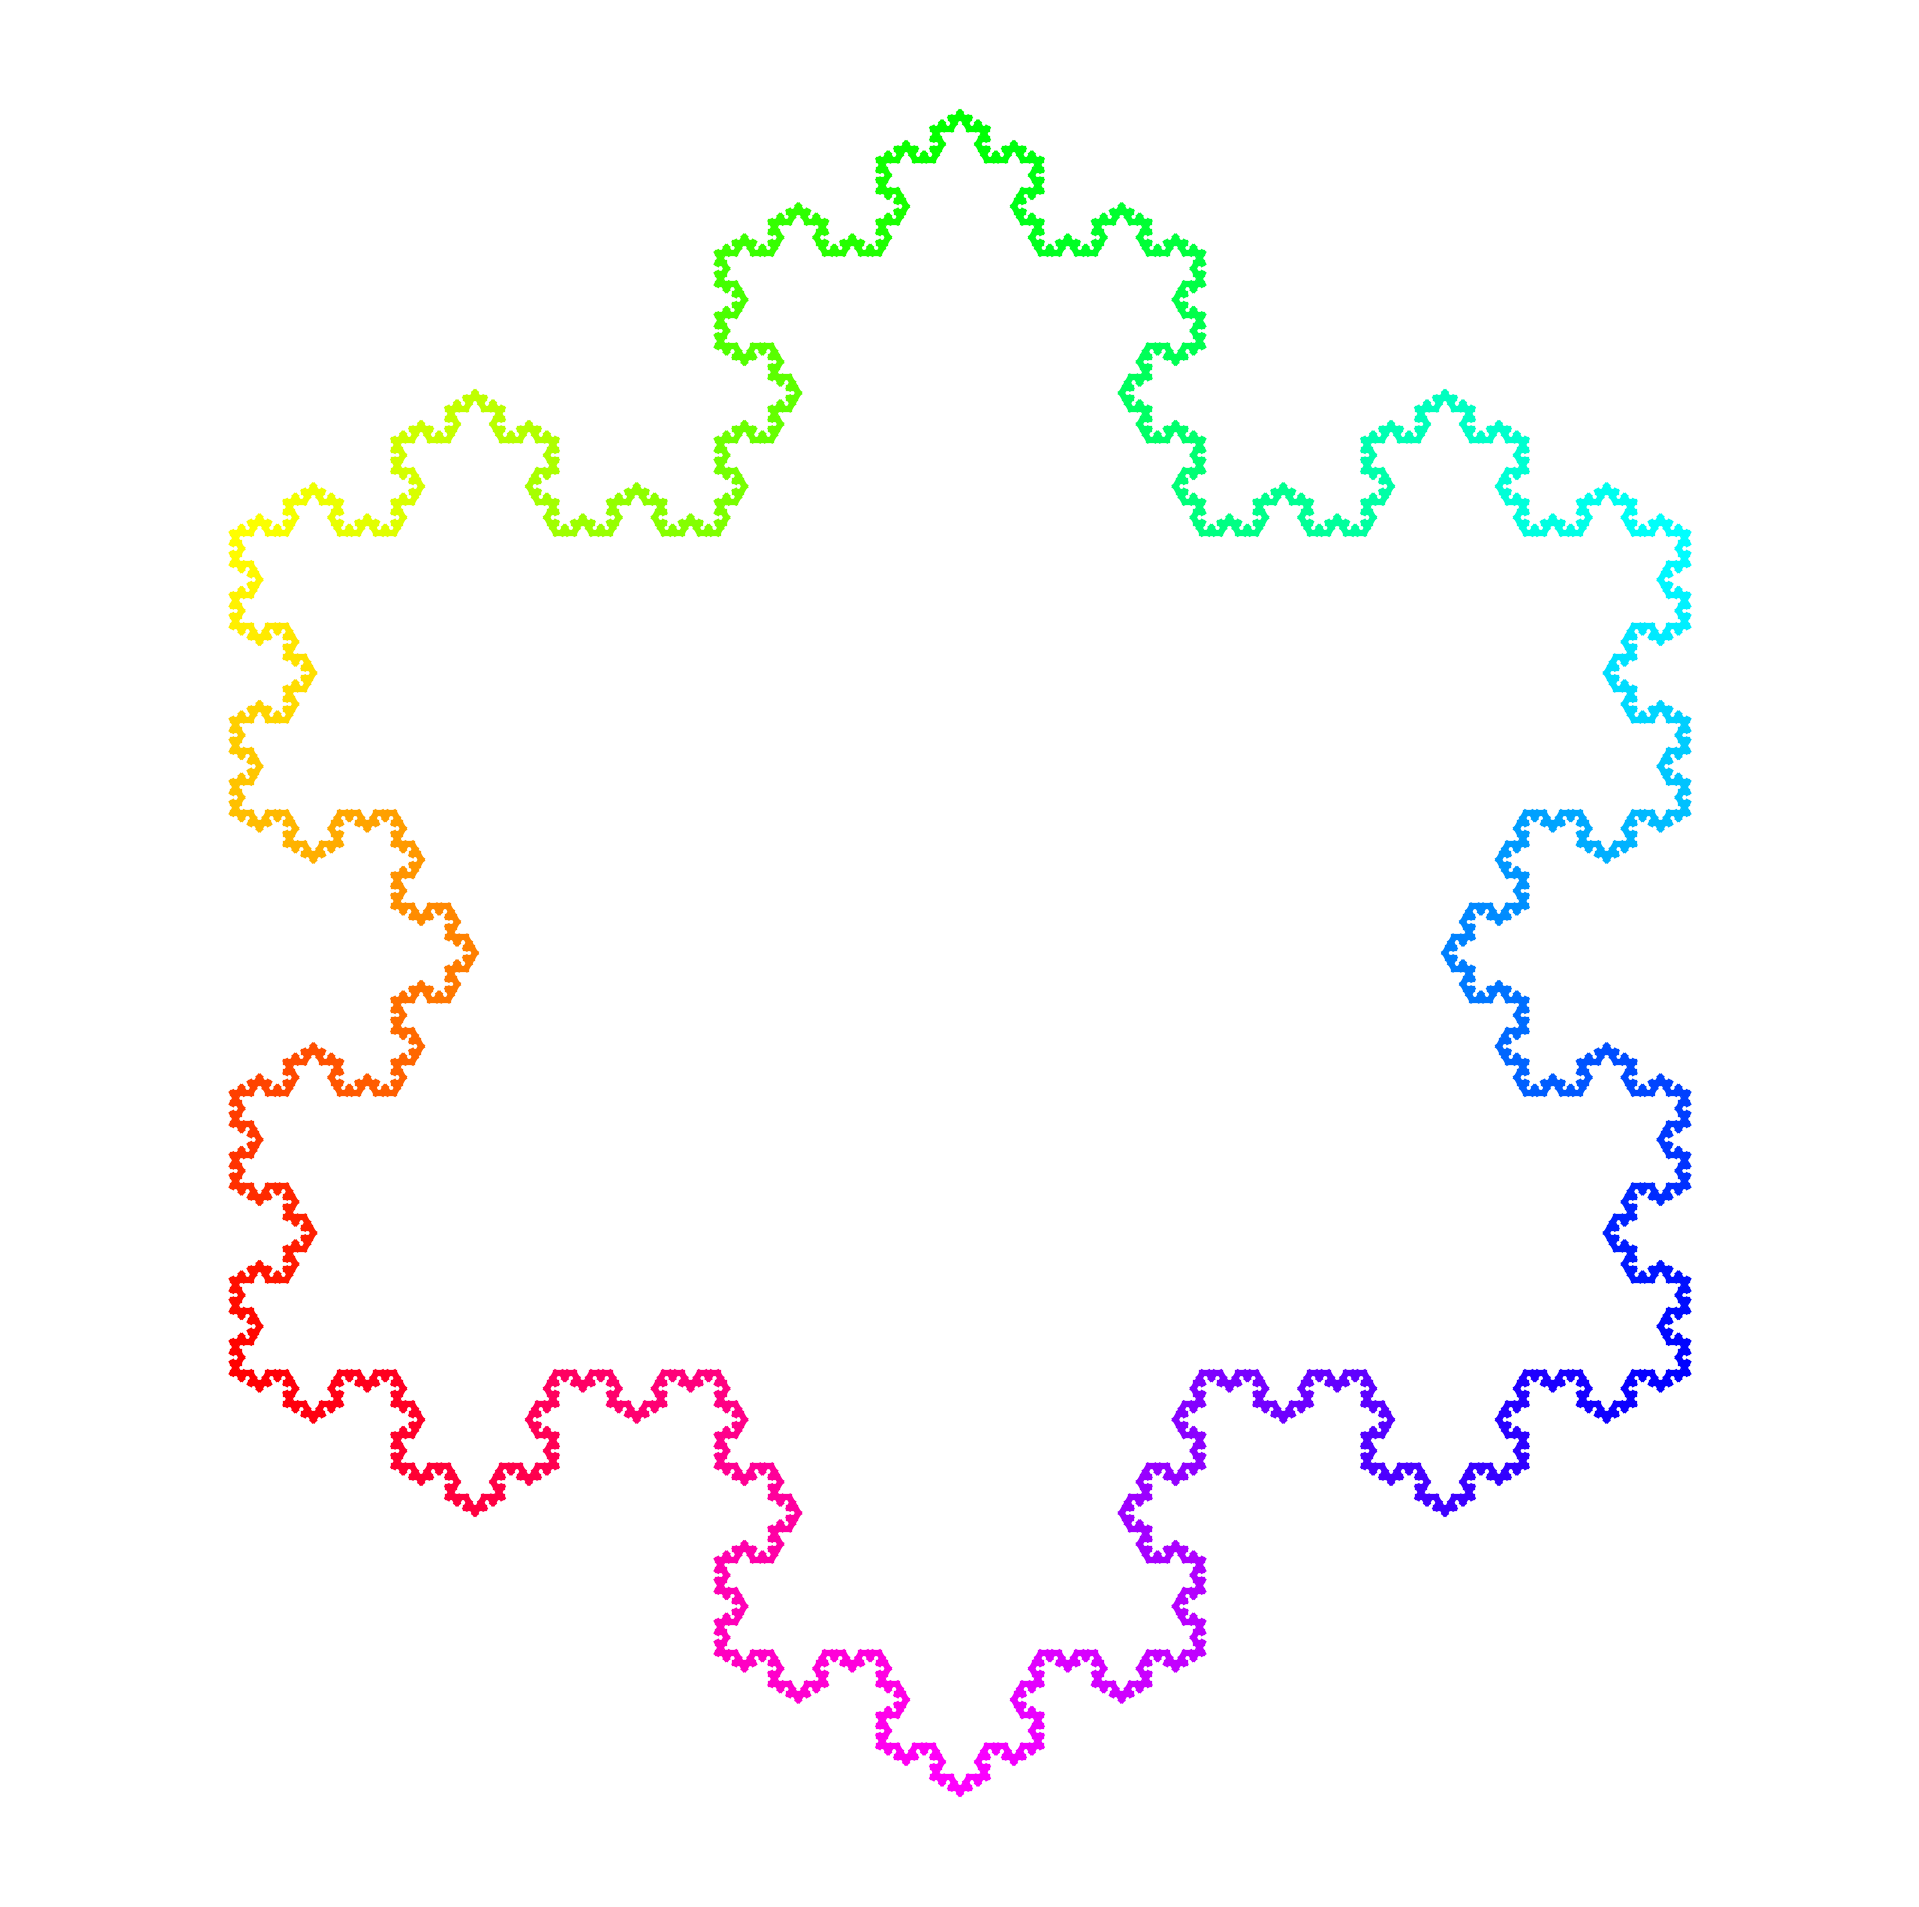

In [2]:
def koch_snowflake(order, scale=1):
    sqrt3 = np.sqrt(3) / 2
    points = np.array([
        [0, 0], 
        [0.5, sqrt3], 
        [1, 0], 
        [0, 0]
    ]) * scale
    
    def koch_iteration(points):
        new_points = []
        for i in range(len(points) - 1):
            p1, p2 = points[i], points[i + 1]
            
            # Compute 1/3 and 2/3 points
            pA = (2*p1 + p2) / 3
            pB = (p1 + 2*p2) / 3
            
            # Compute the peak of the equilateral triangle
            angle = np.pi / 3
            rotation_matrix = np.array([
                [np.cos(angle), -np.sin(angle)],
                [np.sin(angle), np.cos(angle)]
            ])
            pC = pA + np.dot(rotation_matrix, (pB - pA))
            
            new_points.extend([p1, pA, pC, pB])
        new_points.append(points[-1])
        return np.array(new_points)
    
    for _ in range(order):
        points = koch_iteration(points)
    return points

order = 5
points = koch_snowflake(order)

# Color gradient based on position
num_points = len(points)
colors = [hsv_to_rgb([i/num_points, 1, 1]) for i in range(num_points)]

plt.figure(figsize=(8, 8), dpi=300)
for i in range(len(points) - 1):
    plt.plot(
        [points[i, 0], points[i + 1, 0]], 
        [points[i, 1], points[i + 1, 1]], 
        color=colors[i]
    )
plt.axis("equal")
plt.axis("off")
plt.savefig("koch_snowflake.png", dpi=300, bbox_inches='tight')
plt.show()


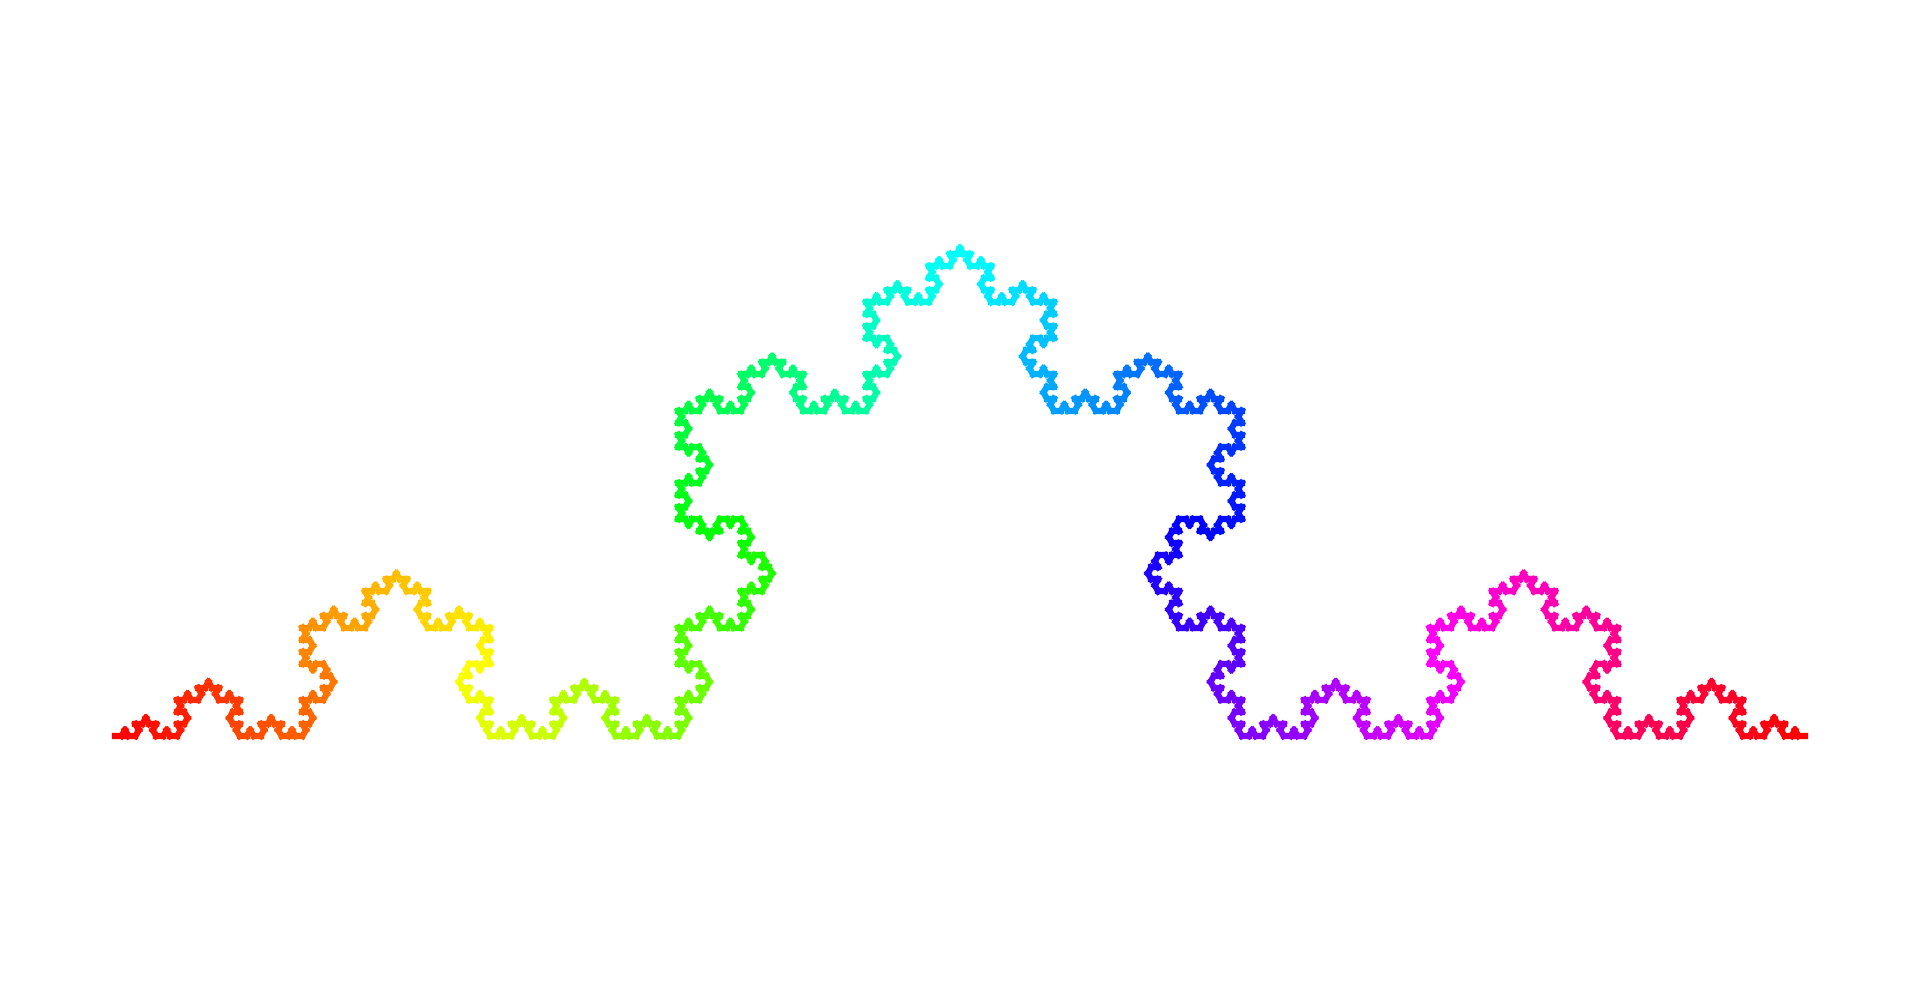

In [3]:
def koch_curve(order, scale=1):
    points = np.array([
        [0, 0], 
        [1, 0]
    ]) * scale
    
    def koch_iteration(points):
        new_points = []
        for i in range(len(points) - 1):
            p1, p2 = points[i], points[i + 1]
            
            # Compute 1/3 and 2/3 points
            pA = (2*p1 + p2) / 3
            pB = (p1 + 2*p2) / 3
            
            # Compute the peak of the equilateral triangle
            angle = np.pi / 3
            rotation_matrix = np.array([
                [np.cos(angle), -np.sin(angle)],
                [np.sin(angle), np.cos(angle)]
            ])
            pC = pA + np.dot(rotation_matrix, (pB - pA))
            
            new_points.extend([p1, pA, pC, pB])
        new_points.append(points[-1])
        return np.array(new_points)
    
    for _ in range(order):
        points = koch_iteration(points)
    return points

order = 5
points = koch_curve(order)

# Color gradient based on position
num_points = len(points)
colors = [hsv_to_rgb([i/num_points, 1, 1]) for i in range(num_points)]

plt.figure(figsize=(8, 4), dpi=300)
for i in range(len(points) - 1):
    plt.plot(
        [points[i, 0], points[i + 1, 0]], 
        [points[i, 1], points[i + 1, 1]], 
        color=colors[i]
    )
plt.axis("equal")
plt.axis("off")
plt.savefig("koch_curve.png", dpi=300, bbox_inches='tight')
plt.show()


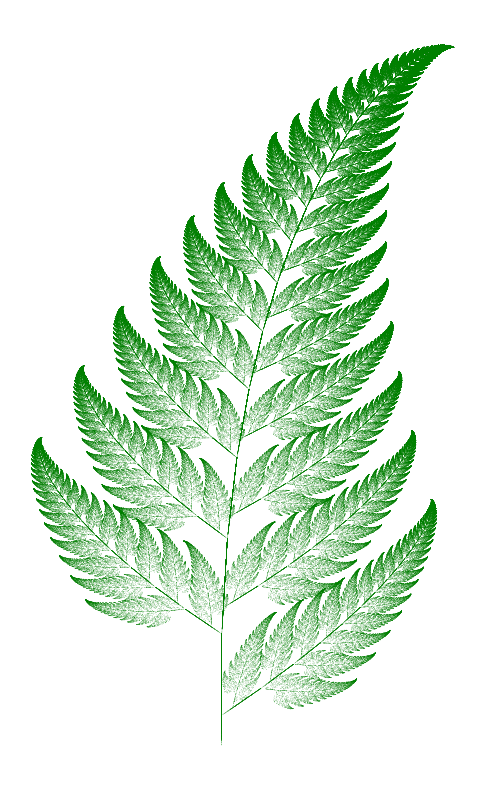

In [4]:
n_points = 1000000

def f1(x, y):
    return 0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6

def f2(x, y):
    return 0.20*x - 0.26*y, 0.23*x + 0.22*y + 1.6

def f3(x, y):
    return -0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44

def f4(x, y):
    return 0, 0.16*y

probs = [0.85, 0.07, 0.07, 0.01]

x, y = 0.0, 0.0

points = []
for i in range(n_points):
    r = random.random()
    if r < probs[0]:
        x, y = f1(x, y)
    elif r < probs[0] + probs[1]:
        x, y = f2(x, y)
    elif r < probs[0] + probs[1] + probs[2]:
        x, y = f3(x, y)
    else:
        x, y = f4(x, y)
    points.append((x, y))

x_vals, y_vals = zip(*points)

plt.figure(figsize=(6, 10))
plt.scatter(x_vals, y_vals, s=0.1, color="green", edgecolors="none")
#plt.title("Barnsley Fern")
plt.axis('off')

plt.savefig("barnsley_fern.png", dpi=300)

plt.show()

In [5]:
def julia_set(width, height, c, max_iter=256):
    # Create a complex grid
    x = np.linspace(-2, 2, width)
    y = np.linspace(-2, 2, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    img = np.zeros(Z.shape, dtype=int)

    for i in range(width):
        for j in range(height):
            z = Z[i, j]
            for n in range(max_iter):
                if abs(z) > 2:
                    img[i, j] = n
                    break
                z = z ** 2 + c
    
    return img

c_values = [
    -0.4 - 0.6j,
    0 - 1j,
    -0.12 - 0.75j,
    -0.6 + 0j,
    -0.8 + 0.16j,
    -0.4 + 0.6j
]

# Image dimensions
width, height = 800, 800

fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=600)

for i, ax in enumerate(axes.flat):
    c = c_values[i]
    img = julia_set(width, height, c)
    cax = ax.imshow(img, cmap='twilight', extent=(-2, 2, -2, 2))
    ax.set_title(f"c = {c}")
    ax.axis('off')

# Common colorbar
#fig.colorbar(cax, ax=axes, orientation='horizontal', fraction=0.02, pad=0.04)

plt.tight_layout()
plt.savefig('julia_sets.png', dpi=600)

plt.show()


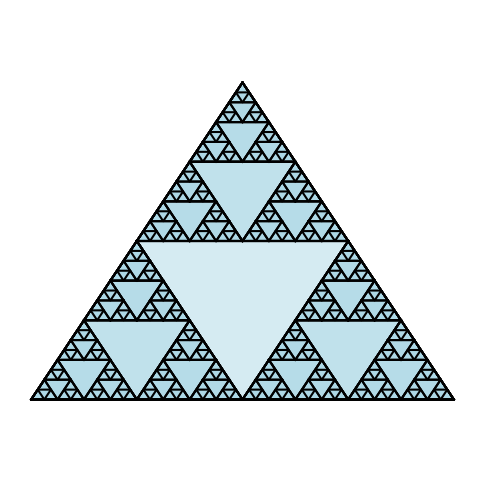

In [6]:
def draw_triangle(points):
    x_vals = [points[0][0], points[1][0], points[2][0], points[0][0]]
    y_vals = [points[0][1], points[1][1], points[2][1], points[0][1]]
    plt.plot(x_vals, y_vals, 'black')
    plt.fill(x_vals, y_vals, 'lightblue', alpha=0.5)

def get_mid(p1, p2):
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

def sierpinski(points, degree):
    draw_triangle(points)
    if degree > 0:
        sierpinski([points[0], get_mid(points[0], points[1]), get_mid(points[0], points[2])], degree - 1)
        sierpinski([points[1], get_mid(points[0], points[1]), get_mid(points[1], points[2])], degree - 1)
        sierpinski([points[2], get_mid(points[2], points[1]), get_mid(points[0], points[2])], degree - 1)

my_points = [[200, -100], [0, 200], [-200, -100]]

plt.figure(figsize=(6, 6))
plt.axis('equal')
plt.axis('off') 

sierpinski(my_points, 5)

plt.savefig("sierpinski_triangle.png", dpi=300, bbox_inches='tight')

plt.show()

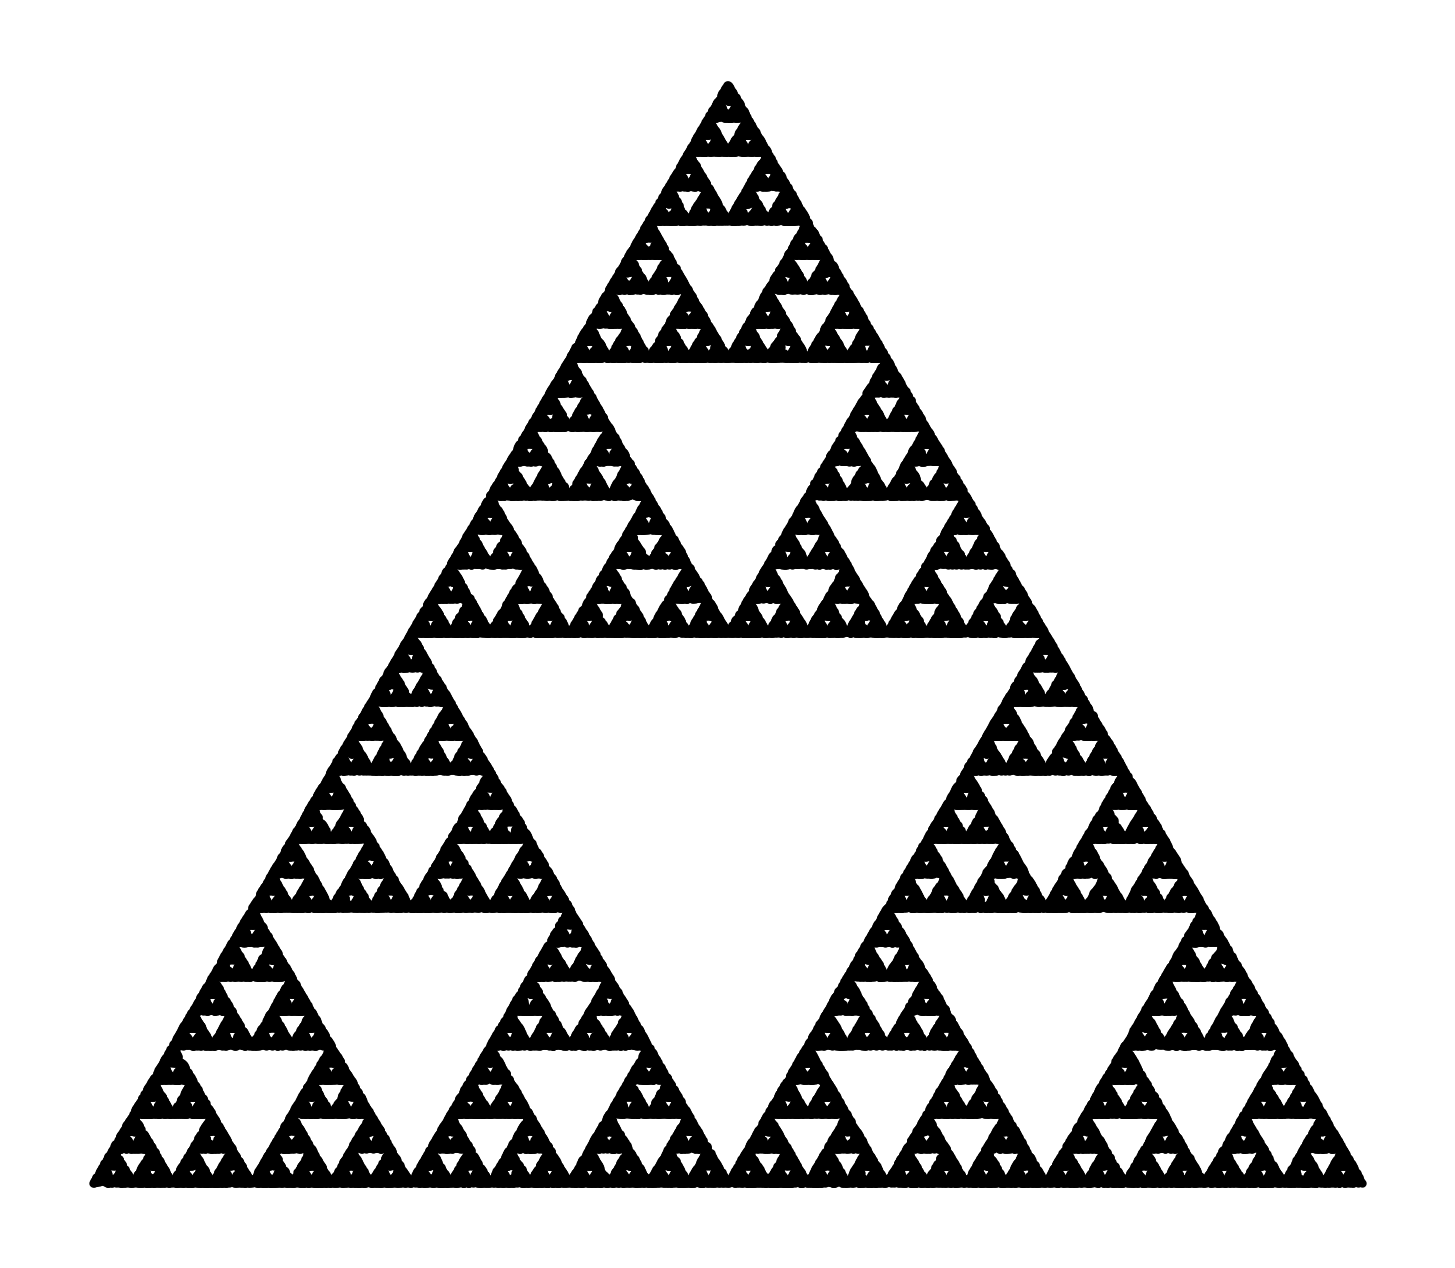

In [7]:
def f1(x, y):
    # Transform towards vertex (0, 0)
    return (x / 2, y / 2)

def f2(x, y):
    # Transform towards vertex (1, 0)
    return ((x + 1) / 2, y / 2)

def f3(x, y):
    # Transform towards vertex (0.5, sqrt(3)/2)
    return ((x + 0.5) / 2, (y + math.sqrt(3) / 2) / 2)

transformations = [f1, f2, f3]

def sierpinski_triangle(iterations):
    x, y = random.random(), random.random()
    
    points = [(x, y)]
    
    for _ in range(iterations):
        transform = random.choice(transformations)
        
        x, y = transform(x, y)
        
        points.append((x, y))
    
    xs, ys = zip(*points)
    
    plt.figure(figsize=(6, 6), dpi=300)
    plt.scatter(xs, ys, s=1, color='black')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')

    plt.savefig(f'sierpinski_iteration_{iterations}_chaos_game.png', dpi=300, bbox_inches='tight')

    plt.show()

iterations = 100000
sierpinski_triangle(iterations)


C:\Users\iTech\AppData\Local\Temp\ipykernel_12052\2387773320.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((x_pos, y_pos), 1, 1, fill=True,


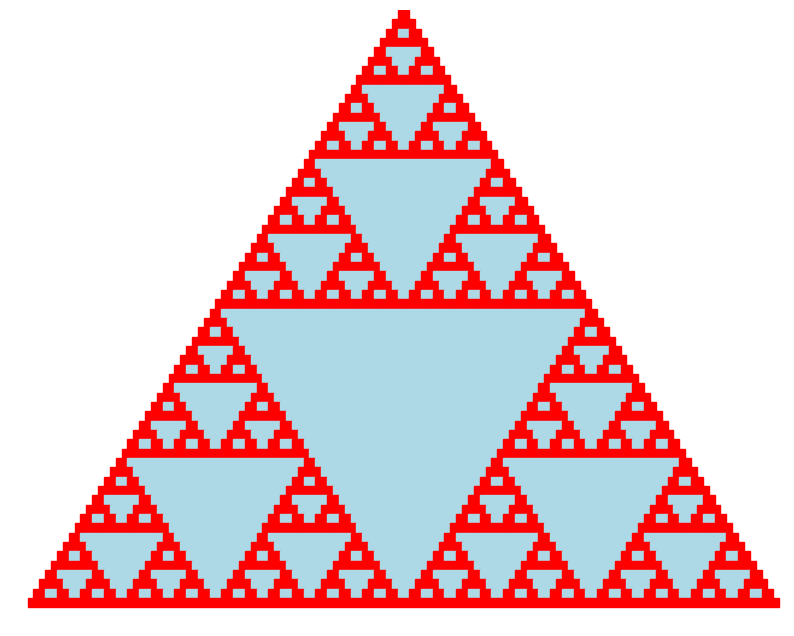

In [8]:
def generate_pascals_triangle_numbers(n):
    triangle = []
    for i in range(n):
        row = [1] * (i + 1)
        for j in range(1, i):
            row[j] = triangle[i-1][j-1] + triangle[i-1][j]
        triangle.append(row)
    return triangle

def plot_pascals_triangle_2d(pascal_triangle, show_numbers=True, save_path=None, dpi=300, draw_rectangles=True):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.axis('off')

    num_rows = len(pascal_triangle)
    max_cols = max(len(row) for row in pascal_triangle)

    for row_num, row in enumerate(pascal_triangle):
        for col_num, value in enumerate(row):
            x_pos = col_num - row_num / 2
            y_pos = -row_num

            # Drawing rectangles if the flag is True
            if draw_rectangles:
                ax.add_patch(plt.Rectangle((x_pos, y_pos), 1, 1, fill=True, 
                                           color='red' if value % 2 != 0 else 'lightblue', edgecolor='black'))

            # Optionally write the Pascal number in the center of each rectangle
            if show_numbers:
                ax.text(x_pos + 0.5, y_pos + 0.5, str(value), 
                        ha='center', va='center', fontsize=12, color='black')

    ax.set_xlim(-max_cols / 2 - 1, max_cols / 2 + 1)
    ax.set_ylim(-num_rows - 1, 1)

    plt.show()

num_rows = 64
pascal_triangle = generate_pascals_triangle_numbers(num_rows)

plot_pascals_triangle_2d(pascal_triangle, show_numbers=False, save_path="pascals_triangle.png", dpi=300, draw_rectangles=True)

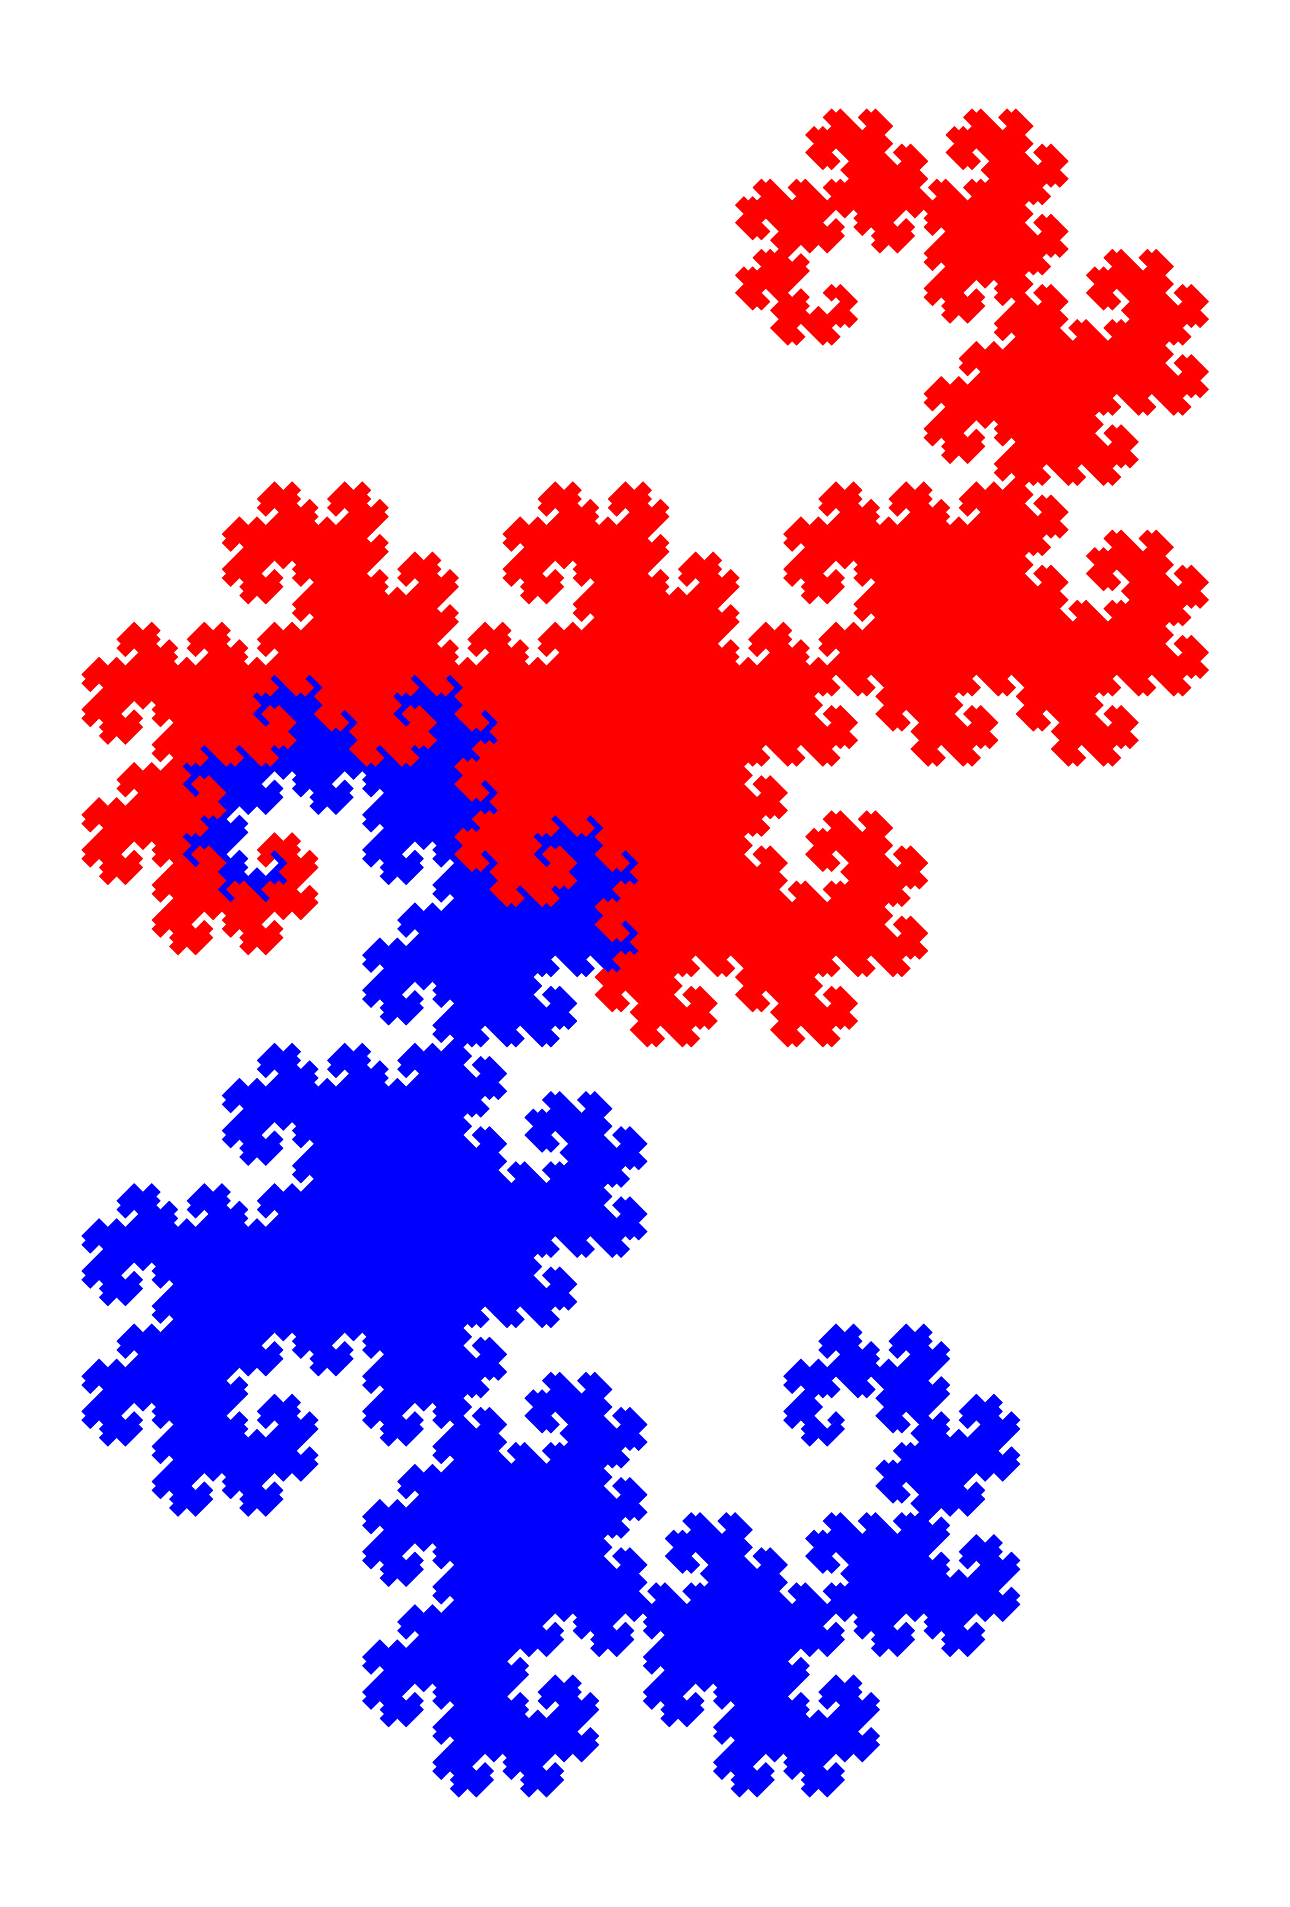

In [9]:
def rotate_point(point, pivot):
    x, y = point
    px, py = pivot
    new_x = px - (y - py)
    new_y = py + (x - px)
    return (new_x, new_y)

def plot_hywei_dragon(n):
    segments = [((0, 0), (1, 1), 'blue')]
    
    for i in range(n):
        segments = [(start, end, 'blue') for (start, end, i) in segments]
        all_points = [point for segment in segments for point in (segment[0], segment[1])]
        if i>1:
            final_pivot = segments[2 ** (i-1)][0]
        else:
            final_pivot = max(all_points, key=lambda p: (p[0], -p[1]))
        
        new_segments = []
        for (start, end, i) in segments:
            rotated_start = rotate_point(start, final_pivot)
            rotated_end = rotate_point(end, final_pivot)
            new_segments.append((rotated_start, rotated_end, 'red'))
        
        segments += new_segments

    plt.figure(figsize=(8, 8), dpi=300)
    for (start, end, color) in segments:
        x_coords = [start[0], end[0]]
        y_coords = [start[1], end[1]]
        plt.plot(x_coords, y_coords, color=color)
    
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.savefig("hywei_dragon.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()

plot_hywei_dragon(15)